# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Load files
city_data_load = "Resources/city_data.csv"
ride_data_load = "Resources/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
total_rides_ct = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_ct
                            

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
total_drivers_ct = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_ct

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_fares_ct = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_ct

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type: total fare/ total rides
avg_fare_ct = total_fares_ct / total_rides_ct
avg_fare_ct

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type: total fare/ total drivers
avg_fare_driver_ct = total_fares_ct / total_drivers_ct
avg_fare_driver_ct

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame: create dataframe .DataFrame()
pyber_sum_df = pd.DataFrame({
    "Total Rides" : total_rides_ct,
    "Total Drivers" : total_drivers_ct,
    "Total Fares" : total_fares_ct,
    "Avrg Fare per Ride" : total_fares_ct,
    "Avrg Fare per Driver" : avg_fare_driver_ct
}) 
pyber_sum_df

,Total Rides,Total Drivers,Total Fares,Avrg Fare per Ride,Avrg Fare per Driver
type,,,,,
Rural,125,78,4327.93,4327.93,55.486282
Suburban,625,490,19356.33,19356.33,39.502714
Urban,1625,2405,39854.38,39854.38,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_sum_df.index.name = None


In [13]:
#  8. Format the columns.
pyber_sum_df['Total Rides'] = pyber_sum_df['Total Rides'].map ('{:,}'.format)
pyber_sum_df['Total Drivers'] = pyber_sum_df['Total Drivers'].map ('{:,}'.format) 
pyber_sum_df['Total Fares'] = pyber_sum_df['Total Fares'].map ('${:,.2f}'.format) 
pyber_sum_df['Avrg Fare per Ride'] = pyber_sum_df['Avrg Fare per Ride'].map ('${:,.2f}'.format) 
pyber_sum_df['Avrg Fare per Driver'] = pyber_sum_df['Avrg Fare per Driver'].map ('${:,.2f}'.format) 
pyber_sum_df

,Total Rides,Total Drivers,Total Fares,Avrg Fare per Ride,Avrg Fare per Driver
Rural,125,78,"$4,327.93","$4,327.93",$55.49
Suburban,625,490,"$19,356.33","$19,356.33",$39.50
Urban,"1,625","2,405","$39,854.38","$39,854.38",$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame 
pyber_data_df.head(15)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [15]:
#7.2 datatype for the index to datetime conversion. df.index = pd.to_datetime(df.index)
#pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])
#pyber_data_df.info()

In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_per_day = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fares_per_day.head(10)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
       2019-01-08 06:19:45    19.39
       2019-01-09 15:30:35    31.84
       2019-01-11 04:39:27    16.42
       2019-01-14 07:09:17    18.05
       2019-01-14 15:58:48    54.10
Name: fare, dtype: float64

In [17]:
# 3. Reset the index on the DataFrame you created in 
#1. This is needed to use the 'pivot()' function.
fares_per_day = fares_per_day.reset_index()
fares_per_day

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [18]:
#7.1 check date data type 
fares_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2375 non-null   object 
 1   date    2375 non-null   object 
 2   fare    2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_per_day = fares_per_day.pivot(index='date',columns ='type', values='fare' )
fares_per_day

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_fares_per_day = fares_per_day.loc['2019-01-01':'2019-04-28']
jan_apr_fares_per_day.head(30)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_apr_fares_per_day.index = pd.to_datetime(jan_apr_fares_per_day.index)

In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fares_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_per_week = jan_apr_fares_per_day.resample('W').sum()
fares_per_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


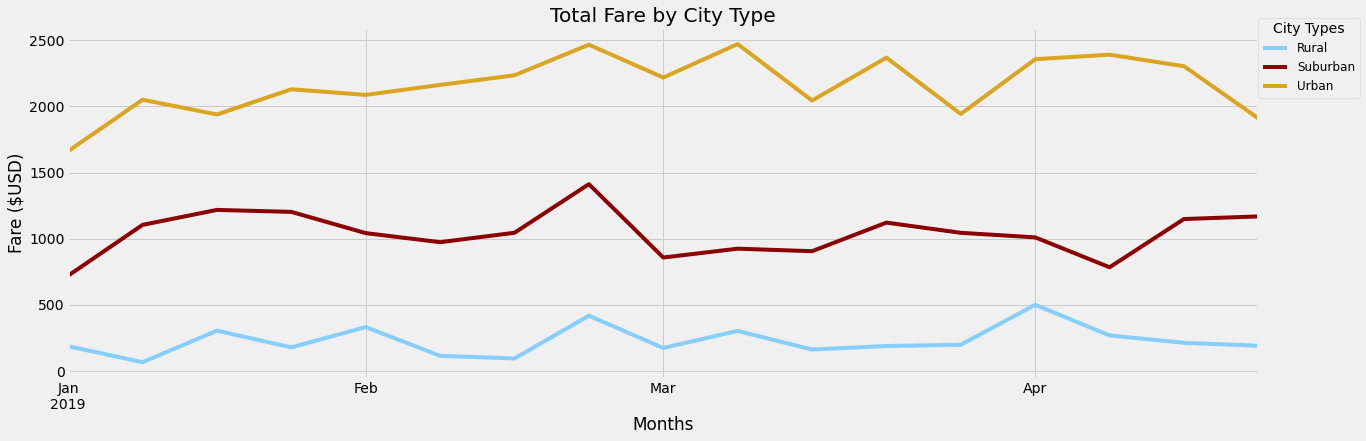

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#object oriented interface with df.plot() method
fig, ax = plt.subplots(figsize=(19,6))
fares_per_week.plot(kind="line", ax=ax, color=["lightskyblue", "darkred", "goldenrod"])
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Months")
ax.set_xlim([pd.to_datetime('2019-01-01 00:08:16'), pd.to_datetime('2019-04-28 23:10:18')])
lgnd = plt.legend(fontsize="12", mode="Expanded", title="City Types", loc=(1,0.8))
                    
plt.savefig("analysis/total_fares_by_city_type.png", dpi=300, bbox_inches = "tight") 

plt.show()
